<a href="https://colab.research.google.com/github/JhonFiUNFV/python_prep/blob/master/T8_4_SVM_Face_Recognition_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/joanby/python-ml-course/blob/master/notebooks/T8%20-%204%20-%20SVM%20-%20Face%20Recognition-Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clonamos el repositorio para obtener los dataSet

In [1]:
!git clone https://github.com/joanby/python-ml-course.git

Cloning into 'python-ml-course'...
remote: Enumerating objects: 17706, done.
remote: Total 17706 (delta 0), reused 0 (delta 0), pack-reused 17706
Receiving objects: 100% (17706/17706), 523.15 MiB | 18.65 MiB/s, done.
Resolving deltas: 100% (333/333), done.
Checking out files: 100% (16940/16940), done.


# Damos acceso a nuestro Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')
# Test it
!ls '/content/drive/My Drive' 

Mounted at /content/drive
'2. Intermedio'
 Canva
'CFA - LEVEL II - TANDEM FINANCE'
 Classroom
'Colab Notebooks'
 Curso_Proyectos_InviertePE
'CV_JHON VIDAL FIGUEROA CÉSPEDES .pdf'
 Data
'Data (1).xlsx'
 Data.gsheet
 Data.xlsx
 GRUPOS_PY.gsheet
'informe5 (1).gsheet'
 informe5.gsheet
'Investigación UX - JHON VIDAL FIGUEROA CÉSPEDES.gsheet'
 LeWagon
 Master.xlsx
 ModuloII_FundamentosdeMachineLearning
 ModuloIV_ManejodeBasedeDatos
 ProgramadeEspecializacionenDataScience
 PROYECTO_CONSTRUCCION.docx
'PROYECTO GRUPO 01.pptx'
 python-ml
'QUANT 2021'
'SEMINARIO DE ADM DE RIESGO EN BANCA'
'Sesión 2-20220320T150758Z-001.zip'
'Teoria Económica y Finanzas'
 Worksheet.xlsx


In [3]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

# Reconocimiento Facial

In [4]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

In [5]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [6]:
print(faces.target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


In [7]:
print(faces.images.shape)

(1348, 62, 47)


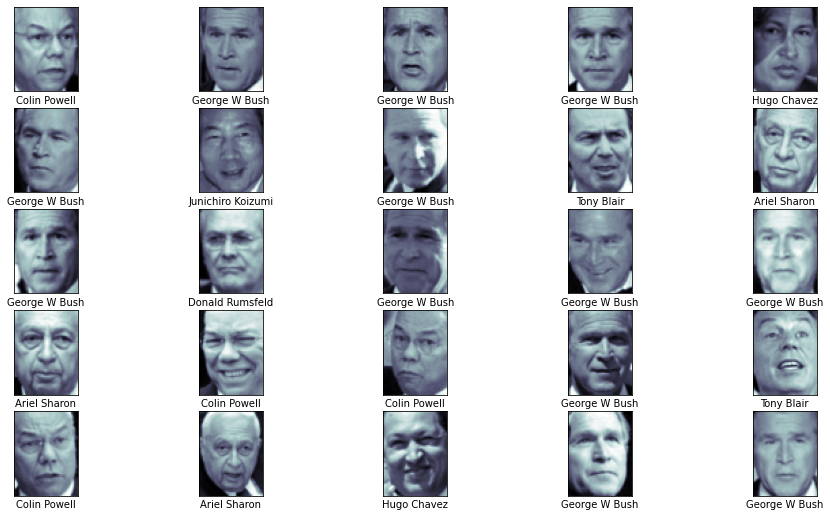

In [8]:
fig, ax = plt.subplots(5,5, figsize=(16,9))
for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(faces.images[i], cmap="bone")
    ax_i.set(xticks=[], yticks=[],xlabel=faces.target_names[faces.target[i]])

In [9]:
62*47

2914

In [10]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

In [11]:
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel="rbf", class_weight="balanced")
model = make_pipeline(pca, svc)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(faces.data, faces.target, random_state = 42)

In [15]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [16]:
param_grid = {
    "svc__C":[0.1,1,5,10,50],
    "svc__gamma":[0.0001, 0.0005, 0.001, 0.005, 0.01]
}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, Ytrain)

CPU times: user 1min 34s, sys: 1min 2s, total: 2min 37s
Wall time: 1min 26s


GridSearchCV(estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=150, random_state=42,
                                            whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [0.1, 1, 5, 10, 50],
                         'svc__gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01]})

In [17]:
print(grid.best_params_)

{'svc__C': 10, 'svc__gamma': 0.001}


In [18]:
classifier = grid.best_estimator_
yfit = classifier.predict(Xtest)

Text(0.5, 0.98, 'Predicciones de las imágnes (incorrectas en rojo)')

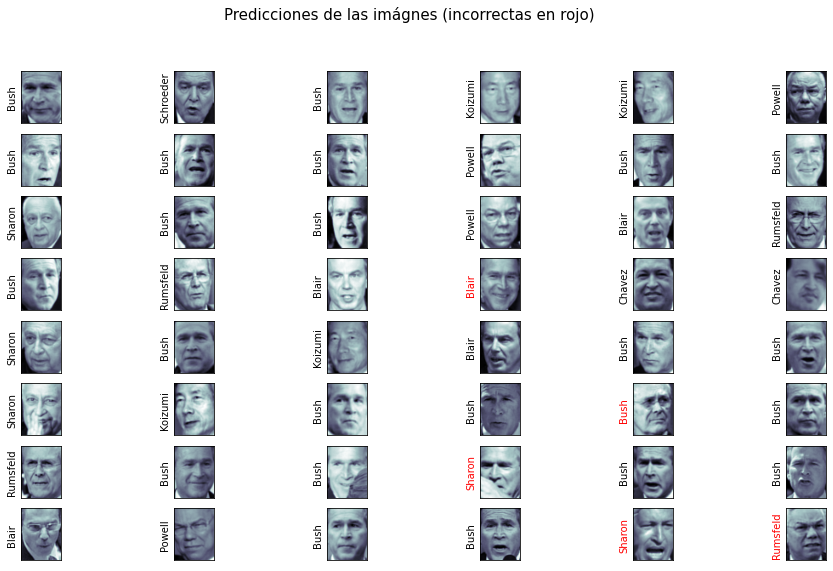

In [19]:
fig, ax = plt.subplots(8,6,figsize=(16,9))

for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(Xtest[i].reshape(62,47), cmap="bone")
    ax_i.set(xticks=[], yticks=[])
    ax_i.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color = "black" if yfit[i]==Ytest[i] else "red")

fig.suptitle("Predicciones de las imágnes (incorrectas en rojo)", size = 15)

In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(Ytest, yfit, target_names = faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
mat = confusion_matrix(Ytest, yfit)

In [24]:
import seaborn as sns; sns.set()

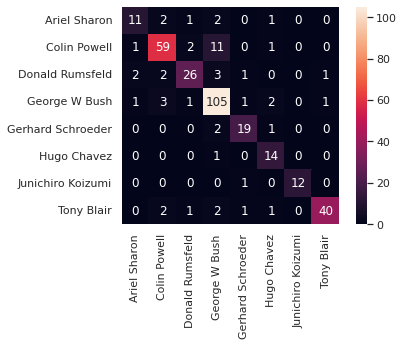

In [25]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, 
            xticklabels=faces.target_names, yticklabels=faces.target_names )